In [ ]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
%env TF_ENABLE_ONEDNN_OPTS=0
import tensorflow as tf

env: TF_ENABLE_ONEDNN_OPTS=0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/content/drive/MyDrive/gaborfinal',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('/content/drive/MyDrive/gaborfinal',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 7169349 (27.35 MB)
Trainable params: 131845 (515.02 KB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [ ]:
history=model.fit(train_data,steps_per_epoch=40, epochs=12, validation_data=valid_data, callbacks=[early_stopping])

Epoch 1/12
40/40 [==============================] - 388s 10s/step - loss: 0.9157 - accuracy: 0.6867 - val_loss: 0.8329 - val_accuracy: 0.7045
Epoch 2/12
40/40 [==============================] - 149s 4s/step - loss: 0.8154 - accuracy: 0.7048 - val_loss: 0.8121 - val_accuracy: 0.7182
Epoch 3/12
40/40 [==============================] - 103s 3s/step - loss: 0.7918 - accuracy: 0.7080 - val_loss: 0.8060 - val_accuracy: 0.7182
Epoch 4/12
40/40 [==============================] - 68s 2s/step - loss: 0.8081 - accuracy: 0.7103 - val_loss: 0.7984 - val_accuracy: 0.7168
Epoch 5/12
40/40 [==============================] - 53s 1s/step - loss: 0.7609 - accuracy: 0.7203 - val_loss: 0.7142 - val_accuracy: 0.7387
Epoch 6/12
40/40 [==============================] - 46s 1s/step - loss: 0.7612 - accuracy: 0.7234 - val_loss: 0.7424 - val_accuracy: 0.7127
Epoch 7/12
40/40 [==============================] - 38s 962ms/step - loss: 0.7457 - accuracy: 0.7293 - val_loss: 0.8054 - val_accuracy: 0.6854
Epoch 8/12
40

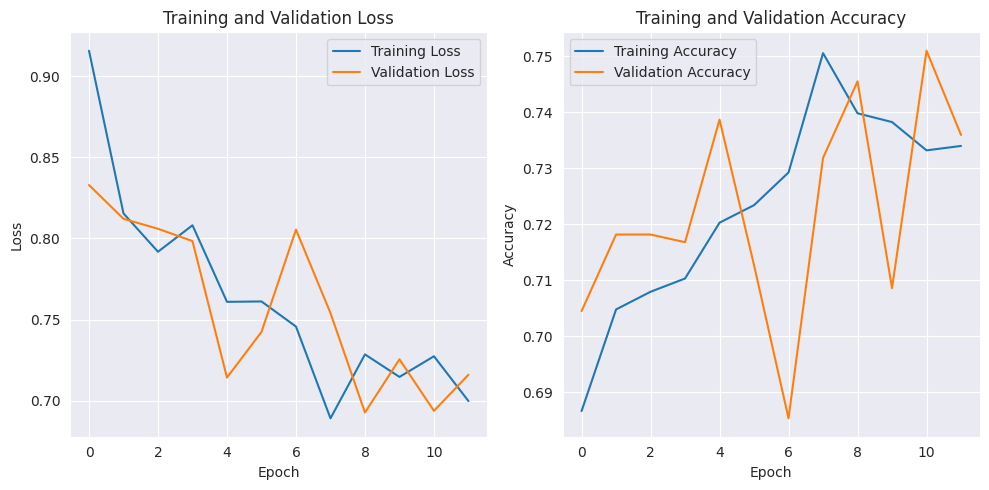

In [ ]:
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_data = datagen.flow_from_directory('/content/drive/MyDrive/gaborfinal',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 731 images belonging to 5 classes.


In [ ]:
evaluation_result=model.evaluate(test_data,verbose=1)
print("Test loss: ",evaluation_result[0])
print("Test Accuracy: ",evaluation_result[1])

23/23 [==============================] - 13s 548ms/step - loss: 0.7101 - accuracy: 0.7346
Test loss:  0.7100696563720703
Test Accuracy:  0.7346101403236389
